In [1]:
%%capture
import sys
import glob, os
os.chdir('/home/m/m300878/submesoscaletelescope/notebooks/may22/')
sys.path.insert(1, '../')
from icon_smt_levels import dzw, dzt, depthc, depthi
sys.path.insert(1, '/home/m/m300878/submesoscaletelescope/run_batch_job/model_evaluation/')
#from eval_funcs import *
import eval_funcs as eva

import pandas as pd
import netCDF4 as nc
import xarray as xr    
import numpy as np
import datetime          #https://docs.python.org/3/library/datetime.html

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d  #for converting cell to grid-centered coordinates
import cartopy.crs as ccrs
ccrs_proj = ccrs.PlateCarree()
import pyicon as pyic

In [59]:
path_data = '/work/mh0033/m300878/parameterization/time_averages/one_week_march/s_2d_mean.nc'
n_dmean = xr.open_dataset(path_data, chunks=dict(depthi=1, time=1))

In [60]:
n_dmean

<xarray.Dataset>
Dimensions:  (time: 3, depthc: 112, ncells: 59799625)
Coordinates:
  * time     (time) datetime64[ns] 2010-03-16 2010-03-18 2010-03-20
  * depthc   (depthc) float64 2.5 6.5 9.5 12.5 ... 4.51e+03 4.975e+03 5.49e+03
Dimensions without coordinates: ncells
Data variables:
    S001_sp  (time, depthc, ncells) float32 dask.array<chunksize=(1, 112, 59799625), meta=np.ndarray>

In [61]:
x = n_dmean.S001_sp.isel(time=1,depthc=10)

In [62]:
lon_reg = [-65, -60]
lat_reg = [38.75, 41.25]
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'



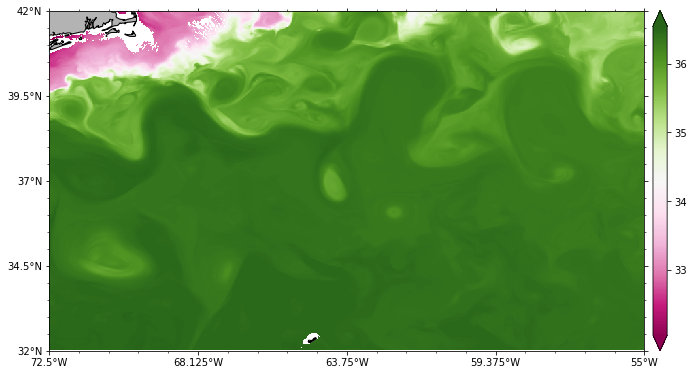

In [63]:
lon_reg = [-72.5, -55]
lat_reg = [32, 42]
clim= -0.00001, 0.00001
clim=1e-7
asp = (lat_reg[1]-lat_reg[0])/(lon_reg[1]-lon_reg[0])
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=asp, fig_size_fac=3, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
lon, lat, data = pyic.interp_to_rectgrid(x, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False,  cmap='PiYG')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)